In [23]:
import urllib.request
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Introduction:


Irish birds are more endangered than ever before, with more than a quarter, or 54 species, now on the red list, according to a new report from BirdWatch Ireland [Gilbert, Stanbery & Lewis, 2021](https://birdwatchireland.ie/app/uploads/2021/04/BOCCI-2020-2026.pdf). 

The conservation status of species is signalled using a traffic light system. Of the 211 species assessed, 54 (26%) were placed on the Red list, 79 (37%) on the Amber list and 78 (37%) on the Green list. 



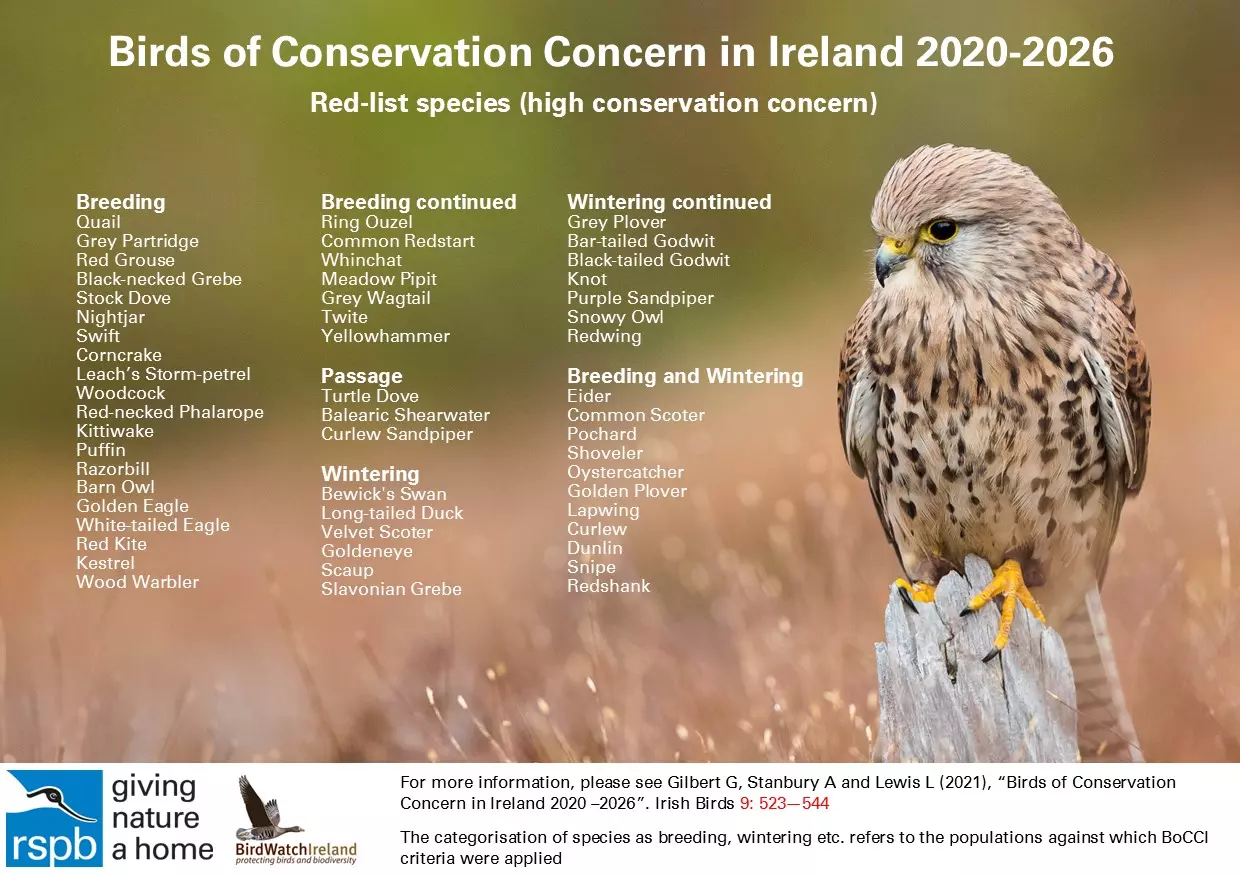

## Dataset:


Dataset downloaded from https://maps.biodiversityireland.ie/Dataset/155 and stored locally at `"C:\Users\Cian\Workstation\Datasets\BirdsOfIreland.txt"`

Many of the data are collected by volunteers who followstandardised survey methods for breeding and wintering birds
to determine their abundance across a wide range of habitats.


## Convert `txt` to `csv`


Firstly, took originall `.txt` file and paste it into a plain text file created in **VisualStudio**. This creates a plain text with indices (numbered rows) which I think helps later. 

Otherwise have to open as raw byter `"rb"`rather then unicode (`encoding='UTF-8'`). This creates issues later when conevrting byte object to string `df = pd.DataFrame(eval(text))` then to df.

notice the numbers below for reach row

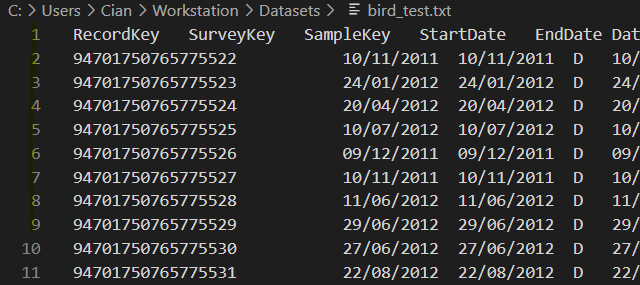

I created a subset of the original Save `BirdsOfIreland.txt` called `bird_test.txt`. Also I am using Windows Anaconda so Im specifying the absolute path below, pointing to where I have saved the dataset locally. 


The second param below in `read_csv` is setting delimiter, what to split on. 

- `\s` matches a single whitespace character, which includes spaces, tabs, form feeds, line feeds and other unicode spaces.

- `\t` Matches a single tab.

In [2]:
df = pd.read_csv(r"C:\Users\Cian\Workstation\Datasets\Bird_dataset.txt", "\t+|\t+", encoding='UTF-8', engine='python') # split by tab

C:\Users\Cian\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.tail(10)

,RecordKey,StartDate,EndDate,DateType,Date,TaxonVersionKey,TaxonName,GridReference Map East,Longitude,Latitude,...,Habitat description,Abundance,Determiner name,Survey name,Common name,Site description,Source,"Habitat code (Fossitt, 2000)",Type of sighting,Activity
116429,99717304002019340,09/02/2022,09/02/2022,D,09/02/2022,NHMSYS0000530420,Lagopus lagopus,O015056,301550,205650,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116430,99717304002019341,23/01/2022,23/01/2022,D,23/01/2022,NHMSYS0000530420,Lagopus lagopus,-6.2392473200,53.2423078500,WGS84,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116431,99717304002019342,03/02/2022,03/02/2022,D,03/02/2022,NHMSYS0000530420,Lagopus lagopus,O177183,317750,218350,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116432,99717304002019343,11/02/2022,11/02/2022,D,11/02/2022,NHMSYS0000530420,Lagopus lagopus,O087063,308750,206350,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116433,99717304002019344,13/02/2022,13/02/2022,D,13/02/2022,NHMSYS0000530420,Lagopus lagopus,W329848,132950,84850,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116434,99717304002019345,16/02/2022,16/02/2022,D,16/02/2022,NHMSYS0000530420,Lagopus lagopus,-6.2217756600,53.1560326700,WGS84,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116435,99717304002019346,28/01/2022,28/01/2022,D,28/01/2022,NHMSYS0000530420,Lagopus lagopus,M644597,164450,259750,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116436,99717304002019347,21/02/2022,21/02/2022,D,21/02/2022,NHMSYS0000530420,Lagopus lagopus,-6.2990504700,53.0377849300,WGS84,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116437,99717304002019348,28/01/2022,28/01/2022,D,28/01/2022,NHMSYS0000530420,Lagopus lagopus,M632598,163250,259850,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116438,99717304002019349,28/02/2022,28/02/2022,D,28/02/2022,NHMSYS0000530420,Lagopus lagopus,-9.8596524000,53.8832511000,WGS84,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['RecordKey', 'StartDate', 'EndDate', 'DateType', 'Date',
       'TaxonVersionKey', 'TaxonName', 'GridReference Map East', 'Longitude',
       'Latitude', 'Precision', 'SiteKey', 'SiteName', 'Recorder',
       'Determiner', 'ZeroAbundance', 'UnderValidation', 'ImagePath',
       'Record comment', 'Vice-county', 'County', 'Habitat description',
       'Abundance', 'Determiner name', 'Survey name', 'Common name',
       'Site description', 'Source', 'Habitat code (Fossitt, 2000)',
       'Type of sighting', 'Activity'],
      dtype='object')

## Convert df to CSV


In [5]:
df.to_csv('Bird_dataset.csv', encoding='utf-8', index=False)

# Cleaning dataset 



- In Excel, removed none latitide longitude coordinates (Irish OSI Map references)
- In Excel, some data entries shifted to the right, thus ensured all data was in correct column
- saved as `Bird_dataset_long_lat.csv`

In [81]:
# import cleaned CSV as a df
df = pd.read_csv('Bird_dataset_long_lat.csv')

C:\Users\Cian\AppData\Local\Temp\ipykernel_3600\2592921030.py:2: DtypeWarning: Columns (0,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Bird_dataset_long_lat.csv')


In [84]:
df.head()

,RecordKey,StartDate,EndDate,DateType,Date,TaxonVersionKey,TaxonName,Longitude,Latitude,Grid Reference,...,Habitat description,Abundance,Determiner name,Survey name,Common name,Site description,Source,"Habitat code (Fossitt, 2000)",Type of sighting,Activity
0,9.97173E+16,28/02/2022,28/02/2022,D,28/02/2022,NHMSYS0000530420,Lagopus lagopus,-9.859652,53.883251,WGS84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.97173E+16,21/02/2022,21/02/2022,D,21/02/2022,NHMSYS0000530420,Lagopus lagopus,-6.299050,53.037785,WGS84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.97173E+16,16/02/2022,16/02/2022,D,16/02/2022,NHMSYS0000530420,Lagopus lagopus,-6.221776,53.156033,WGS84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.97173E+16,04/02/2022,04/02/2022,D,04/02/2022,NHMSYS0000530420,Lagopus lagopus,-6.461017,52.940109,WGS84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.97173E+16,04/02/2022,04/02/2022,D,04/02/2022,NHMSYS0000530420,Lagopus lagopus,-6.460975,52.940112,WGS84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
len(df)

48172

So we have 48172 entries (rows)

If we plot, should reflect the rough shape of Ireland. Any Outliers will be removed

In [86]:
#### remove missing locations 
df.dropna(subset = ['Longitude', 'Latitude'], inplace = True)

### length of dataframe

In [87]:
len(df) # no NaN's bases on df(len)

48172

### Identify Outliers

Below graph shows outliers, especially along Latitude (from UK)

C:\Users\Cian\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x1000 with 0 Axes>

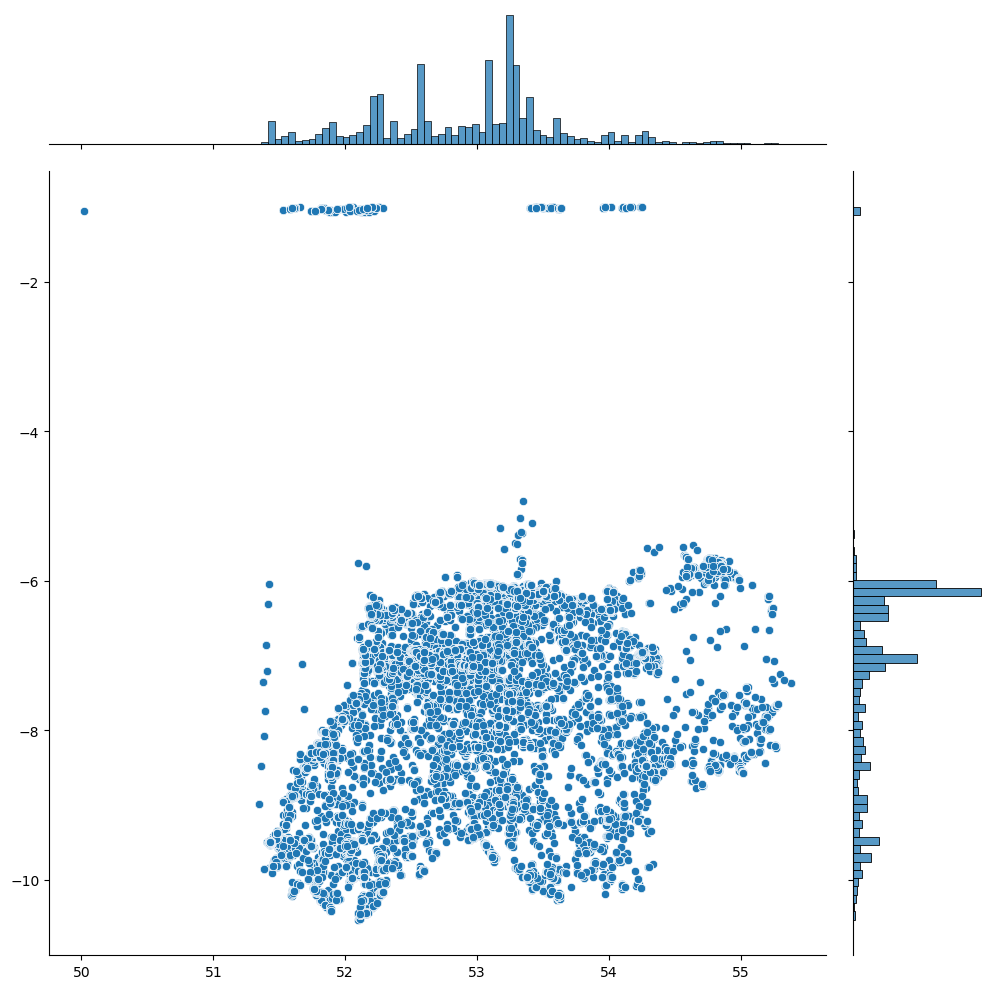

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [88]:
# reference: https://github.com/Shreyas3108/house-price-prediction/blob/master/housesales.ipynb
plt.figure(figsize=(10,10))
sns.jointplot(x=df.Latitude.values, y=df.Longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
#plt1 = plt()
sns.despine

Count: 48172

In [89]:
df[['Longitude', 'Latitude']].describe(percentiles=[.01,.05,.1,.25,.5,.9,.95,.99]) # maybe dipslay by two decomal point

,Longitude,Latitude
count,48172.000000,48172.000000
mean,-7.192546,52.931223
std,1.378342,0.720914
min,-10.534509,50.022479
1%,-10.137438,51.430895
5%,-9.702485,51.702430
10%,-9.471117,51.943130
25%,-8.169280,52.360819
50%,-6.936137,53.090208
90%,-6.059604,53.741628


Filter out outliers if needed by taking range between 1% - 99% for both Latitude and Longitude percentiles (0.0 - 0.99)

In [90]:
df_f = df[df.apply(lambda row: (-10.13<=row['Longitude']<= -5.61) and (51.43<=row['Latitude']<=54.82), axis=1) ]


C:\Users\Cian\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x1000 with 0 Axes>

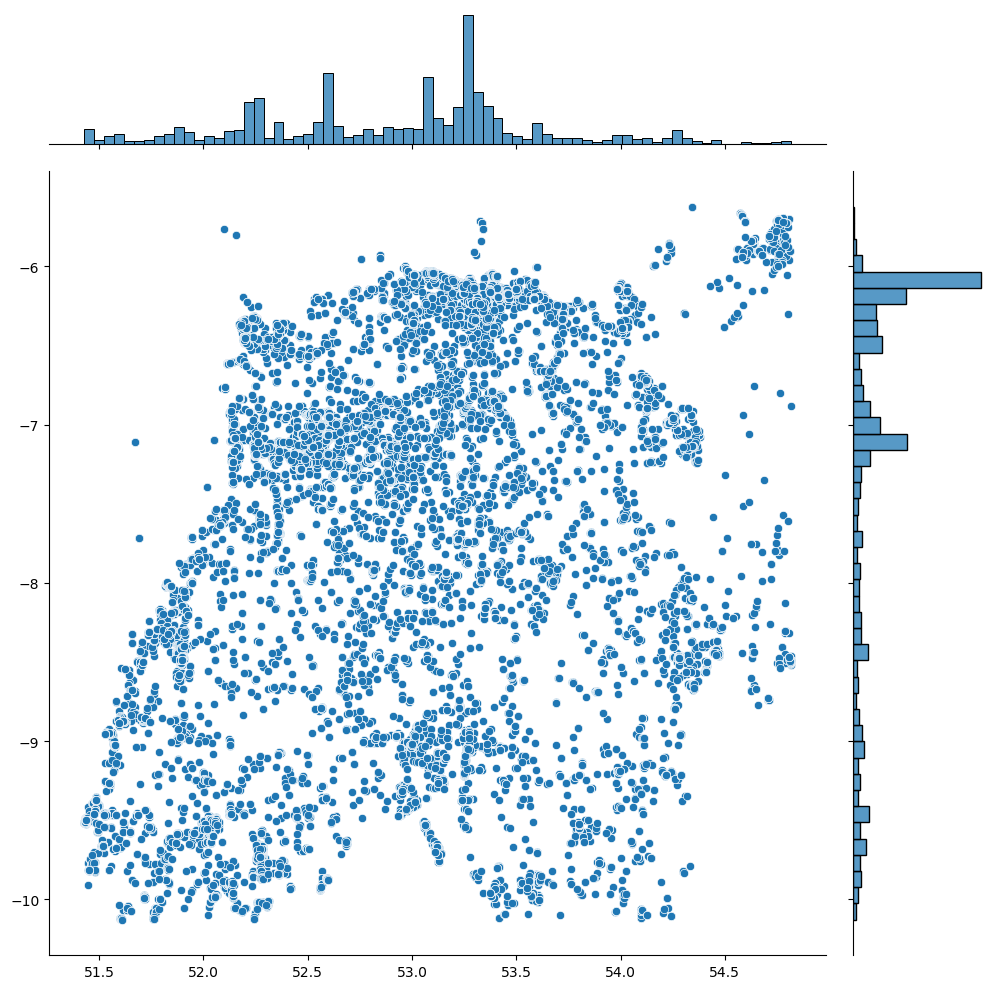

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [91]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df_f.Latitude.values, y=df_f.Longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
#plt1 = plt()
sns.despine

In [92]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46211 entries, 0 to 48171
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RecordKey                     46211 non-null  object 
 1   StartDate                     46211 non-null  object 
 2   EndDate                       46211 non-null  object 
 3   DateType                      46211 non-null  object 
 4   Date                          46211 non-null  object 
 5   TaxonVersionKey               46211 non-null  object 
 6   TaxonName                     46211 non-null  object 
 7   Longitude                     46211 non-null  float64
 8   Latitude                      46211 non-null  float64
 9   Grid Reference                46211 non-null  object 
 10  Precision                     46211 non-null  int64  
 11  SiteKey                       46211 non-null  object 
 12  SiteName                      46211 non-null  object 
 13  R

### number of outliers removed:

In [93]:
print('before filtering outliers: ', len(df))

before filtering outliers:  48172


In [94]:
print('after filtering outliers: ', len(df_f))

after filtering outliers:  46211


In [95]:
total_removed = len(df) - len(df_f)

print('total number of outliers removed :', total_removed)

total number of outliers removed : 1961


### update our df

In [96]:
df_f.head()

,RecordKey,StartDate,EndDate,DateType,Date,TaxonVersionKey,TaxonName,Longitude,Latitude,Grid Reference,...,Habitat description,Abundance,Determiner name,Survey name,Common name,Site description,Source,"Habitat code (Fossitt, 2000)",Type of sighting,Activity
0,9.97173E+16,28/02/2022,28/02/2022,D,28/02/2022,NHMSYS0000530420,Lagopus lagopus,-9.859652,53.883251,WGS84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.97173E+16,21/02/2022,21/02/2022,D,21/02/2022,NHMSYS0000530420,Lagopus lagopus,-6.299050,53.037785,WGS84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.97173E+16,16/02/2022,16/02/2022,D,16/02/2022,NHMSYS0000530420,Lagopus lagopus,-6.221776,53.156033,WGS84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.97173E+16,04/02/2022,04/02/2022,D,04/02/2022,NHMSYS0000530420,Lagopus lagopus,-6.461017,52.940109,WGS84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.97173E+16,04/02/2022,04/02/2022,D,04/02/2022,NHMSYS0000530420,Lagopus lagopus,-6.460975,52.940112,WGS84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# remove undeed columns

df = df_f[['Date','TaxonName','Longitude','Latitude',]]

In [98]:
# convert the 'Date' column to datetime format
df['Date']= pd.to_datetime(df['Date'])

C:\Users\Cian\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/02/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Cian\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/02/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Cian\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/02/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Cian\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31/01/2022' in DD/MM/YYYY format. Provide format or specify in

In [99]:
df.head()

,Date,TaxonName,Longitude,Latitude
0,2022-02-28,Lagopus lagopus,-9.859652,53.883251
1,2022-02-21,Lagopus lagopus,-6.299050,53.037785
2,2022-02-16,Lagopus lagopus,-6.221776,53.156033
3,2022-04-02,Lagopus lagopus,-6.461017,52.940109
4,2022-04-02,Lagopus lagopus,-6.460975,52.940112


In [28]:
df.describe()

,Longitude,Latitude
count,46211.000000,46211.000000
mean,-7.200964,52.931014
std,1.208926,0.672075
min,-10.128895,51.430064
25%,-8.007488,52.440372
50%,-6.916540,53.090775
75%,-6.153631,53.299279
max,-5.622996,54.817115


Use our lat/long mean displayed above to help folium find Ireland map location later.

### Total_Counts column

Create a column so we can count the occurance of each bird species (used later for colour in folium map)

In [100]:
df['Total_Count'] = df.groupby('TaxonName')['TaxonName'].transform('count')

C:\Users\Cian\AppData\Local\Temp\ipykernel_3600\2019311759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Count'] = df.groupby('TaxonName')['TaxonName'].transform('count')


In [101]:
df.head()

,Date,TaxonName,Longitude,Latitude,Total_Count
0,2022-02-28,Lagopus lagopus,-9.859652,53.883251,135
1,2022-02-21,Lagopus lagopus,-6.299050,53.037785,135
2,2022-02-16,Lagopus lagopus,-6.221776,53.156033,135
3,2022-04-02,Lagopus lagopus,-6.461017,52.940109,135
4,2022-04-02,Lagopus lagopus,-6.460975,52.940112,135


In [102]:
df.tail()

,Date,TaxonName,Longitude,Latitude,Total_Count
48145,1982-01-06,Cygnus olor,-9.044237,52.944862,530
48146,1982-02-05,Anas platyrhynchos,-9.086895,52.950603,662
48169,1977-01-08,Cinclus cinclus,-9.555187,52.016578,120
48170,1977-06-30,Arenaria interpres,-6.237809,53.326398,255
48171,1977-06-30,Larus fuscus,-6.237809,53.326398,235


## Single count per occurance

Later will segment species (`TaxonName`) into dates ect. and will need to ass a numerical value to represent every record

First will ensure `Date` is correctly formatted:

In [103]:
df['Date']= pd.to_datetime(df['Date'])

C:\Users\Cian\AppData\Local\Temp\ipykernel_3600\2691600196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']= pd.to_datetime(df['Date'])


In [104]:
df.head()

,Date,TaxonName,Longitude,Latitude,Total_Count
0,2022-02-28,Lagopus lagopus,-9.859652,53.883251,135
1,2022-02-21,Lagopus lagopus,-6.299050,53.037785,135
2,2022-02-16,Lagopus lagopus,-6.221776,53.156033,135
3,2022-04-02,Lagopus lagopus,-6.461017,52.940109,135
4,2022-04-02,Lagopus lagopus,-6.460975,52.940112,135


In [117]:
# instead of cumilative counts, this will be a single digit '1' under col my_count
df['my_count']=1

C:\Users\Cian\AppData\Local\Temp\ipykernel_3600\2998916178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['my_count']=1


### TaxonName check:

In [258]:
# display full list of counts 
pd.set_option("display.max_rows", None)

In [259]:
print(df['TaxonName'].value_counts(ascending=True))

Ardeola ralloides                        1
Calidris himantopus                      1
Ficedula parva                           1
Anthus cervinus                          1
Gavia pacifica                           1
Rhodostethia rosea                       1
Falco vespertinus                        1
Emberiza calandra                        1
Acrocephalus agricola                    1
Larus michahellis                        1
Cettia cetti                             1
Alectoris rufa                           1
Botaurus stellaris                       1
Aythya nyroca                            1
Pagophila eburnea                        1
Carduelis flammea                        1
Gavia adamsii                            1
Carpodacus erythrinus                    1
Anthus trivialis                         1
Coturnix coturnix                        1
Locustella luscinioides                  1
Calidris minutilla                       1
Tarsiger cyanurus                        1
Sturnus ros

In [254]:
for bird in df['TaxonName'].unique():
    print('TaxonName {}; has a total count of {:.0f}'.format(bird, (df[df['TaxonName'] == bird]['Total_Count'].max())))

TaxonName Lagopus lagopus; has a total count of 135
TaxonName Circus cyaneus; has a total count of 545
TaxonName Emberiza citrinella; has a total count of 654
TaxonName Buteo buteo; has a total count of 2130
TaxonName Oenanthe oenanthe; has a total count of 283
TaxonName Dendrocopos major; has a total count of 334
TaxonName Tyto alba; has a total count of 152
TaxonName Asio otus; has a total count of 112
TaxonName Gallinula chloropus; has a total count of 436
TaxonName Troglodytes troglodytes; has a total count of 1048
TaxonName Corvus corax; has a total count of 468
TaxonName Parus major; has a total count of 692
TaxonName Pyrrhula pyrrhula; has a total count of 466
TaxonName Phylloscopus collybita; has a total count of 529
TaxonName Carduelis carduelis; has a total count of 673
TaxonName Corvus frugilegus; has a total count of 822
TaxonName Corvus monedula; has a total count of 793
TaxonName Fringilla coelebs; has a total count of 924
TaxonName Cyanistes caeruleus; has a total count 

TaxonName Plectrophenax nivalis; has a total count of 6
TaxonName Sturnus roseus; has a total count of 1
TaxonName Calidris pusilla; has a total count of 5
TaxonName Calidris minutilla; has a total count of 1
TaxonName Stercorarius longicaudus; has a total count of 7
TaxonName Larus sabini; has a total count of 11
TaxonName Stercorarius pomarinus; has a total count of 9
TaxonName Oceanites oceanicus; has a total count of 4
TaxonName Oceanodroma leucorhoa; has a total count of 8
TaxonName Puffinus gravis; has a total count of 3
TaxonName Calcarius lapponicus; has a total count of 5
TaxonName Tryngites subruficollis; has a total count of 10
TaxonName Circus macrourus; has a total count of 2
TaxonName Anas querquedula; has a total count of 9
TaxonName Calidris acuminata; has a total count of 3
TaxonName Anthus trivialis; has a total count of 1
TaxonName Motacilla flava; has a total count of 3
TaxonName Calandrella brachydactyla; has a total count of 2
TaxonName Gavia adamsii; has a total 

### Grouping Specis

According to Red List, birds species are grouped into Breeding, Wintering, Passage, Breeidng&Wintering

Will group them accordingly

https://sparkbyexamples.com/pandas/pandas-filter-by-column-value/

In [108]:
species = df['TaxonName'].unique()

In [109]:
species

array(['Lagopus lagopus', 'Circus cyaneus', 'Emberiza citrinella',
       'Buteo buteo', 'Oenanthe oenanthe', 'Dendrocopos major',
       'Tyto alba', 'Asio otus', 'Gallinula chloropus',
       'Troglodytes troglodytes', 'Corvus corax', 'Parus major',
       'Pyrrhula pyrrhula', 'Phylloscopus collybita',
       'Carduelis carduelis', 'Corvus frugilegus', 'Corvus monedula',
       'Fringilla coelebs', 'Cyanistes caeruleus', 'Hirundo rustica',
       'Turdus merula', 'Larus fuscus', 'Pyrrhocorax pyrrhocorax',
       'Falco tinnunculus', 'Acrocephalus schoenobaenus',
       'Numenius arquata', 'Sylvia atricapilla', 'Tachybaptus ruficollis',
       'Ardea cinerea', 'Cygnus olor', 'Riparia riparia',
       'Garrulus glandarius', 'Carduelis cabaret', 'Columba palumbus',
       'Erithacus rubecula', 'Periparus ater', 'Turdus philomelos',
       'Corvus cornix', 'Delichon urbicum', 'Sturnus vulgaris',
       'Carduelis cannabina', 'Muscicapa striata', 'Emberiza schoeniclus',
       'Cinclus ci

In [110]:
print('total num of bird species :', len(species))

total num of bird species : 308


List of Red Listed Breeding, Passanger, Wintering and Breeding & Wintering bird species groups. Also have to convert latin name with common name (https://avibase.bsc-eoc.org/checklist.jsp?region=IE&list=howardmoore)  

removed Golden Eagle from `b`

Twite removed from `b` are finches? Carduelis flavirostris nor Linaria flavirostris

Yellowhammer (Emberiza citrinella) removed from `b`


in w:

Greater Scaup	Aythya marila	
Lesser Scaup	Aythya affinis	Rare/Accidental

choose lesser



In [146]:
# Breeding birds

df_b = df[df['TaxonName'].isin(['Coturnix coturnix',
'Perdix perdix',
'Lagopus lagopus',
'Podiceps nigricollis',
'Columba oenas',
'Caprimulgus europaeus',
'Apus apus',
'Crex crex',
'Hydrobates leucorhous',
'Scolopax rusticola',
'Phalaropus lobatus',
'Rissa tridactyla',
'Fratercula arctica',
'Alca torda',
'Tyto alba',
'Haliaeetus albicilla',
'Milvus milvus',
'Falco tinnunculus',
'Rhadina sibilatrix',
'Turdus torquatus',
'Phoenicurus phoenicurus',
'Saxicola rubetra',
'Anthus pratensis',
'Motacilla cinerea']) ]

In [147]:
# Wintering birds

df_w = df[df['TaxonName'].isin(['Cygnus columbianus subsp. bewickii',
'Clangula hyemalis',
'Melanitta fusca',
'Bucephala clangula',
'Aythya affinis',
'Podiceps auritus',
'Pluvialis squatarola',
'Limosa lapponica',
'Limosa limosa',
'Calidris canutus',
'Calidris maritima',
'Bubo scandiaca',
'Turdus iliacus']) ]

In [148]:
# Breeding & Wintering birds

df_bw = df[df['TaxonName'].isin(['Somateria mollissima',
'Melanitta nigra',
'Aythya ferina',
'Anas clypeata',
'Haematopus ostralegus',
'Pluvialis apricaria',
'Vanellus vanellus',
'Numenius arquata',
'Calidris alpina',
'Gallinago gallinago',
'Tringa totanus']) ]

In [ ]:
# Passanger birds

df_p = df[df['TaxonName'].isin(['Streptopelia turtur', 'Puffinus mauretanicus','Calidris ferruginea']) ]

In [268]:
amount = len(df_b['TaxonName'].unique()) + len(df_bw['TaxonName'].unique()) + len(df_w['TaxonName'].unique())+ len(df_p['TaxonName'].unique())

In [269]:
print( "The number of bird species from Red List found in teh dataset is: ",amount)

The number of bird species from Red List found in teh dataset is:  49


In [119]:
# select multiple

# df3['Winter'] = df[df['TaxonName'].isin(['Buteo buteo', 'Turdus merula','Erithacus rubecula','Troglodytes troglodytes','Corvus cornix']) ]

In [120]:
df_p.head(10)

,Date,TaxonName,Longitude,Latitude,Total_Count,my_count
1504,2021-05-16,Streptopelia turtur,-6.731275,53.785803,2,1
5051,2020-12-09,Calidris ferruginea,-9.029349,51.575148,28,1
5066,2020-10-09,Calidris ferruginea,-8.555393,54.321027,28,1
5236,2020-08-26,Calidris ferruginea,-6.347735,52.197390,28,1
13299,2018-04-18,Puffinus mauretanicus,-9.048725,53.273657,16,1
13724,2018-05-03,Puffinus mauretanicus,-6.880733,54.162539,16,1
14214,2018-01-15,Puffinus mauretanicus,-9.721366,52.281339,16,1
15689,2017-02-12,Calidris ferruginea,-8.233838,51.824477,28,1
15808,2017-02-12,Calidris ferruginea,-8.176455,51.860424,28,1
15943,2017-02-12,Calidris ferruginea,-7.890526,51.910831,28,1


# HeatMap with time

- cleopath artcicle https://github.com/zelatyna/Choropleth-maps/blob/master/ppr_heatmap.ipynb
- geojson: https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/ireland-counties.geojson
    - files saved as `ireland-counties.geojson`

In [272]:
import datetime 
import folium
from folium.plugins import HeatMap, HeatMapWithTime


In [277]:
gradient = {0.2: 'blue', 0.5: 'lime', 1: 'red'}

In [273]:
import branca.colormap as cm

In [274]:
def get_center_latlong(df):
    # get the center of my map for plotting
    centerlat = (df['Latitude'].max() + df['Latitude'].min()) / 2
    centerlong = (df['Longitude'].max() + df['Longitude'].min()) / 2
    return centerlat, centerlong

In [275]:
get_center_latlong(df)

(53.12358926, -7.875945250000001)

In [276]:
center = get_center_latlong(df)

# create a LinearColorMap and assign colors, vmin, and vmax
colormap = cm.LinearColormap(colors=['red', 'yellow', 'green'], vmin=1, vmax=2183) 

# create our map again.  This time I am using a different tileset for a new look
m = folium.Map(location=center, zoom_start=7, tiles='Stamen Toner')

# Same as before... go through each home in set, make circle, and add to map.
# This time we add a color using count and the colormap object
for i in range(len(df)):
    folium.Circle(
        location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
        radius=10,
        fill=True,
        color=colormap(df.iloc[i]['Total_Count']),# colour by counts of bird species
        fill_opacity= 0.2
    ).add_to(m)

# the following line adds the scale directly to our map
m.add_child(colormap)

# Save map 
m.save('price_colormap.html')

heatmap `breeding`

In [149]:
hm = HeatMap(data = df_b[['Latitude','Longitude','my_count']]).add_to(m)


heatmap `breeding and wintering`

In [150]:
hm = HeatMap(data = df_bw[['Latitude','Longitude','my_count']]).add_to(m)


heatmap `wintering`

In [151]:
hm = HeatMap(data = df_w[['Latitude','Longitude','my_count']]).add_to(m)


heatmap `passanger`

In [130]:
hm = HeatMap(data = df_p[['Latitude','Longitude','my_count']]).add_to(m)


In [131]:
# denominations in the json file
import json
communities_geo = r'ireland-counties.geojson'

# open the json file - json.load() methods returns a python dictionary
with open(communities_geo) as communities_file:
    communities_json = json.load(communities_file)
    
# we loop through the dictionary to obtain the name of the communities in the json file
denominations_json = []
for index in range(len(communities_json['features'])):
    denominations_json.append(communities_json['features'][index]['properties']['name'])
    
denominations_json

['Limerick City',
 'Limerick County',
 'North Tipperary',
 'South Tipperary',
 'Waterford City',
 'Waterford County',
 'Galway City',
 'Galway County',
 'Leitrim County',
 'Mayo County',
 'Roscommon County',
 'Sligo County',
 'Cavan County',
 'Donegal County',
 'Monaghan County',
 'Carlow County',
 'Dublin City',
 'South Dublin',
 'Fingal',
 'DÃºn Laoghaire-Rathdown',
 'Kildare County',
 'Kilkenny County',
 'Laois County',
 'Longford County',
 'Louth County',
 'Meath County',
 'Offaly County',
 'Westmeath County',
 'Wexford County',
 'Wicklow County',
 'Clare County',
 'Cork City',
 'Cork County',
 'Kerry County']

https://github.com/zelatyna/Choropleth-maps/blob/master/ppr_heatmap.ipynb

### sort dates in assending order

In [152]:
df_b['Date'].sort_values().unique()
df_bw['Date'].sort_values().unique()
df_w['Date'].sort_values().unique()
df_p['Date'].sort_values().unique()

array(['2003-03-10T00:00:00.000000000', '2004-08-29T00:00:00.000000000',
       '2004-12-02T00:00:00.000000000', '2006-07-01T00:00:00.000000000',
       '2006-09-21T00:00:00.000000000', '2008-12-07T00:00:00.000000000',
       '2009-03-08T00:00:00.000000000', '2009-08-26T00:00:00.000000000',
       '2009-09-23T00:00:00.000000000', '2010-03-08T00:00:00.000000000',
       '2010-04-08T00:00:00.000000000', '2010-07-08T00:00:00.000000000',
       '2010-08-09T00:00:00.000000000', '2010-09-13T00:00:00.000000000',
       '2010-09-16T00:00:00.000000000', '2010-09-17T00:00:00.000000000',
       '2010-09-21T00:00:00.000000000', '2010-10-17T00:00:00.000000000',
       '2010-10-23T00:00:00.000000000', '2011-01-09T00:00:00.000000000',
       '2011-03-09T00:00:00.000000000', '2011-08-19T00:00:00.000000000',
       '2011-08-20T00:00:00.000000000', '2011-08-21T00:00:00.000000000',
       '2011-08-31T00:00:00.000000000', '2011-09-13T00:00:00.000000000',
       '2011-09-17T00:00:00.000000000', '2011-10-10

# HeatMap time



In [153]:
# breeding
df_hour_list_b = []
index = []
for sale_date in df_b['Date'].sort_values().unique():
    df_hour_list_b.append(df_b.loc[df_b['Date'] == sale_date, ['Latitude', 'Longitude', 'my_count']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist())
    index.append(sale_date)

In [154]:
# breeding & wintering
df_hour_list_bw = []
index = []
for sale_date in df_bw['Date'].sort_values().unique():
    df_hour_list_bw.append(df_bw.loc[df_bw['Date'] == sale_date, ['Latitude', 'Longitude', 'my_count']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist())
    index.append(sale_date)

In [155]:
# wintering
df_hour_list_w = []
index = []
for sale_date in df_w['Date'].sort_values().unique():
    df_hour_list_w.append(df_w.loc[df_w['Date'] == sale_date, ['Latitude', 'Longitude', 'my_count']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist())
    index.append(sale_date)

In [156]:
# passanger
df_hour_list_p = []
index = []
for sale_date in df_p['Date'].sort_values().unique():
    df_hour_list_p.append(df_p.loc[df_p['Date'] == sale_date, ['Latitude', 'Longitude', 'my_count']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist())
    index.append(sale_date)

### generate and save the maps

In [158]:
# breeding

base_map_breeding = folium.Map(location=[53.305494, -7.737649], tiles='Stamen Toner',  zoom_start=6, overlay = False)
HeatMapWithTime(df_hour_list_b, radius=25, gradient={0.2: 'blue', 0.4: 'lime', 0.7: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map_breeding)


In [159]:
base_map_breeding.save('HeatMapWithTimeBreeding.html')

In [160]:
# breeding & wintering

base_map_breeding_wintering = folium.Map(location=[53.305494, -7.737649], tiles='Stamen Toner',  zoom_start=6, overlay = False)
HeatMapWithTime(df_hour_list_bw, radius=25, gradient={0.2: 'blue', 0.4: 'lime', 0.7: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map_breeding_wintering)


In [161]:
base_map_breeding_wintering.save('HeatMapWithTimeBreedingWintering.html')

In [162]:
# wintering

base_map_wintering = folium.Map(location=[53.305494, -7.737649], tiles='Stamen Toner',  zoom_start=6, overlay = False)
HeatMapWithTime(df_hour_list_w, radius=25, gradient={0.2: 'blue', 0.4: 'lime', 0.7: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map_wintering)


In [163]:
base_map_wintering.save('HeatMapWithTimeWintering.html')

In [164]:
# passanger
base_map_passanger = folium.Map(location=[53.305494, -7.737649], tiles='Stamen Toner',  zoom_start=6, overlay = False)
HeatMapWithTime(df_hour_list_p, radius=25, gradient={0.2: 'blue', 0.4: 'lime', 0.7: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map_passanger)


In [165]:
base_map_passanger.save('HeatMapWithTimePassanger.html')

In [166]:
base_map_breeding

In [167]:
base_map_breeding_wintering

In [ ]:
base_map_wintering

In [ ]:
base_map_passanger

### data grouped by months

In [225]:
# breeding 
df_months= []
index = []
for sale_date in df_b['Date'].sort_values().unique():
    df_months.append(df_b.loc[df_b['Date'] == sale_date, ['Latitude', 'Longitude', 'my_count']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist())
    index.append(datetime.datetime.utcfromtimestamp(sale_date.astype('O')/1e9).strftime("%m/%Y"))

In [232]:
base_map = folium.Map(location=[53.305494, -7.737649], tiles='Stamen Toner',  zoom_start=6, overlay = False)
# increased radius from 25 to 35
HeatMapWithTime(df_months, radius=35, gradient={0.2: 'blue', 0.4: 'lime', 0.7: 'orange', 1: 'red'}, min_opacity=0.4, max_opacity=0.9, use_local_extrema=True, index= index).add_to(base_map)


In [233]:
base_map

In [ ]:
base_map.save(os.path.join('results', 'HeatMapWithTime_monthly.html'))

https://medium.com/analytics-vidhya/choropleth-maps-plotly-folium-ba18350fb89e

https://github.com/zelatyna/Choropleth-maps/blob/master/Properties%20Prices%20Ireland.ipynb

### dates grouped by year attempt

In [180]:
opsd_daily = df_b .copy()

In [181]:
opsd_daily.head()

,Date,TaxonName,Longitude,Latitude,Total_Count,my_count
0,2022-02-28,Lagopus lagopus,-9.859652,53.883251,135,1
1,2022-02-21,Lagopus lagopus,-6.299050,53.037785,135,1
2,2022-02-16,Lagopus lagopus,-6.221776,53.156033,135,1
3,2022-04-02,Lagopus lagopus,-6.461017,52.940109,135,1
4,2022-04-02,Lagopus lagopus,-6.460975,52.940112,135,1


In [183]:
opsd_daily.set_index('Date')

,TaxonName,Longitude,Latitude,Total_Count,my_count
Date,,,,,
2022-02-28,Lagopus lagopus,-9.859652,53.883251,135,1
2022-02-21,Lagopus lagopus,-6.299050,53.037785,135,1
2022-02-16,Lagopus lagopus,-6.221776,53.156033,135,1
2022-04-02,Lagopus lagopus,-6.461017,52.940109,135,1
2022-04-02,Lagopus lagopus,-6.460975,52.940112,135,1
...,...,...,...,...,...
1997-07-20,Fratercula arctica,-6.060162,53.405899,35,1
1997-06-22,Alca torda,-9.423029,52.977220,148,1
1997-06-22,Fratercula arctica,-9.423029,52.977220,35,1


In [185]:
df_time_indx = opsd_daily.set_index('Date')

In [186]:
df_time_indx['Year'] = df_time_indx.index.year
df_time_indx['Month'] = df_time_indx.index.month

In [187]:
df_time_indx.head()

,TaxonName,Longitude,Latitude,Total_Count,my_count,Year,Month
Date,,,,,,,
2022-02-28,Lagopus lagopus,-9.859652,53.883251,135,1,2022,2
2022-02-21,Lagopus lagopus,-6.299050,53.037785,135,1,2022,2
2022-02-16,Lagopus lagopus,-6.221776,53.156033,135,1,2022,2
2022-04-02,Lagopus lagopus,-6.461017,52.940109,135,1,2022,4
2022-04-02,Lagopus lagopus,-6.460975,52.940112,135,1,2022,4


In [244]:
df_time_indx.tail()

,TaxonName,Longitude,Latitude,Total_Count,my_count,Year,Month
Date,,,,,,,
1997-07-20,Fratercula arctica,-6.060162,53.405899,35,1,1997,7
1997-06-22,Alca torda,-9.423029,52.977220,148,1,1997,6
1997-06-22,Fratercula arctica,-9.423029,52.977220,35,1,1997,6
1994-12-08,Motacilla cinerea,-9.554357,52.001220,405,1,1994,12
1992-10-07,Alca torda,-9.545059,51.739414,148,1,1992,10


In [237]:
# breeding by year
df_years= []
index = [] # for display, stuck on 1970
for sale_date in df_time_indx['Year'].sort_values().unique():
    df_years.append(df_time_indx.loc[df_time_indx['Year'] == sale_date, ['Latitude', 'Longitude', 'my_count']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist())
    index.append(datetime.datetime.utcfromtimestamp(sale_date.astype('O')/1e9).strftime("%m/%Y"))
    

In [238]:
base_map_test = folium.Map(location=[53.305494, -7.737649], tiles='Stamen Toner',  zoom_start=7, overlay = False)
HeatMapWithTime(df_years, radius=25, gradient={0.2: 'blue', 0.4: 'lime', 0.7: 'orange', 1: 'red'}, min_opacity=0.4, max_opacity=0.9, use_local_extrema=True, index= index).add_to(base_map_test)


In [219]:
base_map_test

In [271]:
base_map_test.save(os.path.join('HeatMapWithTime_yearly.html'))

Average the sighting per month, not indivisual sighting 

In [241]:
# breeding by month again
df_month= []
index = [] # for display, stuck on 1970
for sale_date in df_time_indx['Month'].sort_values().unique():
    df_month.append(df_time_indx.loc[df_time_indx['Month'] == sale_date, ['Latitude', 'Longitude', 'my_count']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist())
    index.append(datetime.datetime.utcfromtimestamp(sale_date.astype('O')/1e9).strftime("%m/%Y"))
    

In [243]:
df_month

[[[51.43733734, -9.49784928, 2.0],
  [51.65678859, -8.67659436, 1.0],
  [51.70616966, -8.51659298, 1.0],
  [51.73376102, -8.33071597, 1.0],
  [51.76538, -9.83482, 1.0],
  [51.83740432, -9.61477795, 2.0],
  [51.89829, -8.04373, 1.0],
  [51.9456, -9.58426, 1.0],
  [51.94730265, -9.81049156, 1.0],
  [52.03132, -9.63735, 1.0],
  [52.07813452, -8.11406851, 1.0],
  [52.16029, -7.14418, 1.0],
  [52.18125094, -9.24680024, 1.0],
  [52.18648989, -6.34779712, 2.0],
  [52.18891975, -6.46236579, 2.0],
  [52.19134458, -6.46029353, 1.0],
  [52.19203516, -6.61737565, 1.0],
  [52.19581675, -6.46458507, 1.0],
  [52.19607541, -6.4621083, 3.0],
  [52.1975051, -6.44674301, 1.0],
  [52.19818902, -6.44691467, 1.0],
  [52.20249787, -6.48235202, 1.0],
  [52.20339212, -6.48218036, 1.0],
  [52.20412414, -6.44219558, 1.0],
  [52.25030575, -6.33660001, 4.0],
  [52.25340838, -6.33453012, 1.0],
  [52.25420965, -6.33744836, 1.0],
  [52.28281166, -9.68482057, 1.0],
  [52.28301802, -9.68480414, 1.0],
  [52.33191357, -7

In [242]:
base_map_test_2 = folium.Map(location=[53.305494, -7.737649], tiles='Stamen Toner',  zoom_start=7, overlay = False)
HeatMapWithTime(df_years, radius=25, gradient={0.2: 'blue', 0.4: 'lime', 0.7: 'orange', 1: 'red'}, min_opacity=0.4, max_opacity=0.9, use_local_extrema=True, index= index).add_to(base_map_test_2)


ValueError: Input data and index are not of compatible lengths.